# Recurrent Neural Network

### Importing the libraries

In [20]:
import tensorflow as tf
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Preprocessing

### Loading the dataset

In [21]:
# Load the IMDB dataset
max_features = 10000  # Number of unique words to consider

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

### Preprocessing the training and testing set

In [22]:
max_len = 500  # Maximum number of words per review

# Pad sequences to ensure consistent input size
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

## Building the RNN

### Initialising the RNN

In [23]:
model = tf.keras.models.Sequential()

### Embedding layer

In [24]:
# Embedding layer to represent words as vectors
model.add(tf.keras.layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

### Hidden layers

In [25]:
# Recurrent layer (RNN)
model.add(tf.keras.layers.SimpleRNN(128, dropout=0.2, return_sequences=True))

In [ ]:
# normalization hidden layer to speed up convergence / training
model.add(tf.keras.layers.BatchNormalization())
# stacking another RNN layer to capture deeper sequential data and handle vanishing gradient problem
model.add(tf.keras.layers.SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
# regularization layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.5))

### Output layer

In [27]:
# Output layer (binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [38]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 500, 128)          32896     
                                                                 
 batch_normalization_2 (Batc  (None, 500, 128)         512       
 hNormalization)                                                 
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                      

## Training the RNN

### Compiling the RNN

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

### Training the RNN on the Training set and evaluating it on the Test set

In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 448s 570ms/step - loss: 0.7774 - accuracy: 0.5037 - val_loss: 0.6809 - val_accuracy: 0.5918
Epoch 2/10
782/782 [==============================] - 780s 998ms/step - loss: 0.6358 - accuracy: 0.6347 - val_loss: 0.8046 - val_accuracy: 0.5314
Epoch 3/10
782/782 [==============================] - 640s 818ms/step - loss: 0.5936 - accuracy: 0.6794 - val_loss: 0.7266 - val_accuracy: 0.6011
Epoch 4/10
782/782 [==============================] - 770s 984ms/step - loss: 0.6331 - accuracy: 0.6081 - val_loss: 0.6696 - val_accuracy: 0.6046
Epoch 5/10
782/782 [==============================] - 923s 1s/step - loss: 0.6449 - accuracy: 0.6183 - val_loss: 0.5511 - val_accuracy: 0.7176
Epoch 6/10
782/782 [==============================] - 947s 1s/step - loss: 0.5011 - accuracy: 0.7638 - val_loss: 0.4877 - val_accuracy: 0.7729
Epoch 7/10
782/782 [==============================] - 890s 1s/step - loss: 0.4721 - accuracy: 0.7833 - val_loss: 0.5634 - val_accu

## Visualize the model performance

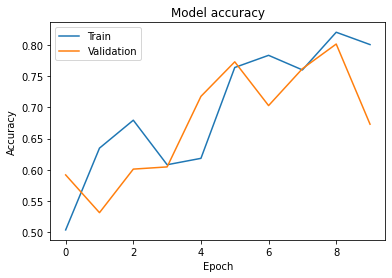

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



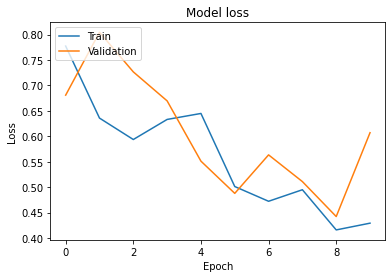

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Making a single prediction

In [34]:
# Test sentence
test_text = "fantastic movie , one of the best of the year!"

# Load word index and adjust with `index_from=3`
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {word: (index + 3) for word, index in word_to_id.items()}  # Shift index by 3

# Add reserved tokens
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<OOV>"] = 2

# Tokenize input sentence
words = test_text.lower().split()
sequence = [word_to_id.get(word, 2) for word in words]  # Default to OOV token if not found
batch_sequence = [sequence]  # Add batch dimension

# Pad the sequence
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(batch_sequence, maxlen=max_len)

print("Original words:", words)
print("Tokenized sequence:", sequence)
print("Padded sequence shape:", padded_sequence.shape)

# Predict sentiment
prediction = model.predict(padded_sequence)

# Interpret result
if prediction[0] > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")



Original words: ['fantastic', 'movie', ',', 'one', 'of', 'the', 'best', 'of', 'the', 'year!']
Tokenized sequence: [777, 20, 2, 31, 7, 4, 118, 7, 4, 2]
Padded sequence shape: (1, 500)
1/1 [==============================] - 0s 84ms/step
Positive sentiment


In [36]:
# Test sentence
test_text = "worst movie , didn't like it at all!"

# Load word index and adjust with `index_from=3`
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {word: (index + 3) for word, index in word_to_id.items()}  # Shift index by 3

# Add reserved tokens
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<OOV>"] = 2

# Tokenize input sentence
words = test_text.lower().split()
sequence = [word_to_id.get(word, 2) for word in words]  # Default to OOV token if not found
batch_sequence = [sequence]  # Add batch dimension

# Pad the sequence
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(batch_sequence, maxlen=max_len)

print("Original words:", words)
print("Tokenized sequence:", sequence)
print("Padded sequence shape:", padded_sequence.shape)

# Predict sentiment
prediction = model.predict(padded_sequence)

# Interpret result
if prediction[0] > 0.5:
    print("Positive sentiment")
else:
    print("Negative sentiment")


Original words: ['worst', 'movie', ',', "didn't", 'like', 'it', 'at', 'all!']
Tokenized sequence: [249, 20, 2, 161, 40, 12, 33, 2]
Padded sequence shape: (1, 500)
1/1 [==============================] - 0s 73ms/step
Negative sentiment
